# Test code for evaluating the uvgap metric
 

### References:
- https://www.skatelescope.org/wp-content/uploads/2012/06/91_Figures-of-Merit-for-SKA-configuration-analysis-RevC.pdf
    - Newer definition of uvgap without gridding in the $|\mathrm{u}|$ direction
- http://www.skatelescope.org/uploaded/44041_107_Memo_Lal.pdf
    - Original uvgap reference
- http://arxiv.org/pdf/1501.01077.pdf
    - use of uvgap in analysis of simulations of IGM
- https://indico.skatelescope.org/event/262/session/2/contribution/7/material/slides/0.pdf
    - Talk on performance of SKA_1 baseline using uvgap
- https://www.skatelescope.org/wp-content/uploads/2013/08/82_Configurations-for-candidate-SKA-sites-design-and-analysis-1.0.pdf
    - Detailed analysis of array configurations for the candidate SKA sites
    - Details several figures of merit as well as results of uvgap

### Notes
- Measure of the average fractional increase in u-v length between u-v points in azimuthal wedges of the uv plane.
- Low values of UVGAP are achieved by having u-v points spread evenly in azimuth and logarithmically in radius on the u-v plane.
- Lower uvgap == better

Number of data points: 9
Bin index of each data point:
bin_idx [ 1  3  3  5  6  7  8  9 10]
Data point index of bin:
data_idx [1 1 3 3 3 5 6 6 7 9]
---
bin 0: 0 1 : [0] [ 1.]
bin 1: 0 1 : [0] [ 1.]
bin 2: 0 3 : [0, 1, 2] [ 1.          0.06880399  0.54547894]
bin 3: 2 3 : [2] [ 0.54547894]
bin 4: 2 4 : [2, 3] [ 0.54547894  0.05788148]
bin 5: 3 5 : [3, 4] [ 0.05788148  0.15255711]
bin 6: 4 6 : [4, 5] [ 0.15255711  0.20128269]
bin 7: 5 7 : [5, 6] [ 0.20128269  0.12038654]
bin 8: 6 8 : [6, 7] [ 0.12038654  0.05212065]
bin 9: 7 8 : [7] [ 0.05212065]


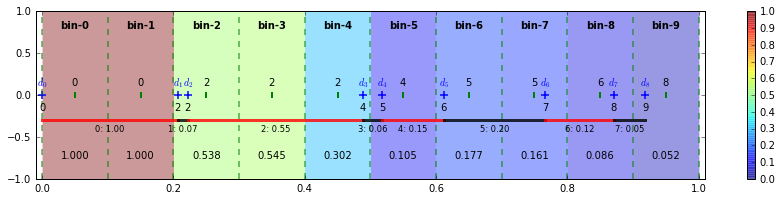

In [4]:
from __future__ import print_function, division, absolute_import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(5)
num_values = 8
num_bins = 10
x = np.random.random(num_values)
x = np.append(x, [0.0])
x = numpy.sort(x)
bin_edges = np.linspace(0, 1, num_bins + 1) 
bin_centres = (bin_edges[1:] + bin_edges[:-1]) / 2
num_values = x.shape[0]

# Bin index of each data point
bin_idx = np.digitize(x, bin_edges)
# Data point gap (diff) index of each bin
data_idx = np.digitize(bin_centres, x)

print('Number of data points:', num_values)
print('Bin index of each data point:')
print('bin_idx', bin_idx)
print('Data point index of bin:')
print('data_idx', data_idx)

x_diff = np.diff(x)
x_diff_norm = x_diff / x[1:]
image = np.zeros((1, num_bins))


# 1. For all bin centres in the gap set their value to the normalised gap difference.
# eg. cell0 and cell1 here take the value the first gap (gap0) == (u1 - u0) / u1
# 2. if more than one gap is in the grid cell set the cell to the mean of the value.
# eg. the centre of cell2 is in the range defined by gaps0, 1 and 2

# # for all grid cells falling into the range defined by (u_{k-1}, u{k}) ...


# Gaps falling into grid cell (bin)
print('---')
for i in range(num_bins):
    # A bin is in the gap if its centre falls in teh range defined by u_{k-1} to u_{k}
    # A gap is in the bin if its points both its points are in the bin...
    # Find index of points to the left and right of the bin edge 
    d0 = np.where(x <= bin_edges[i])[0][-1]
    d1 = np.where(x > bin_edges[i + 1])[0]
    d1 = x.shape[0] - 1 if len(d1) == 0 else d1[0]
    #d1 = np.where(x > bin_edges[i + 1])[0][0]  # FIXME(BM) use argmax / argmin instead?
    #print(i, d0, d1, x_diff_norm[d0:d1])
    diff_ids = range(d0, d1)
    print('bin %i:' % i, d0, d1, ':', range(d0, d1), x_diff_norm[d0:d1])
    image[0, i] = np.mean(x_diff_norm[d0:d1])

# Plotting
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
ax.plot(x, np.zeros_like(x), '+', ms=8, mew=1.5)
ax.set_ylim(-1, 1)
ax.set_xlim(-0.01, 1.01)
for edge in bin_edges:
    ax.plot([edge, edge], ax.get_ylim(), 'g--', lw=2.0, alpha=0.5)
ax.plot(bin_centres, np.zeros_like(bin_centres), 'g|', mew=2.0)
im = ax.imshow(image, interpolation='nearest', cmap='jet',  
               vmin=0.0, vmax=1.0, extent=[0.0, 1.0, -1.0, 1.0],
               alpha=0.4)
ax.figure.colorbar(im, ax=ax)
ax.set_aspect('auto')
for i in range(num_bins):
    ax.text(bin_centres[i], 0.15, '%i' % (data_idx[i] - 1), 
            va='center',  ha='center')
for i in range(num_values):
    ax.text(x[i], -0.15, '%i' % (bin_idx[i] - 1), 
            va='center', ha='center')
    ax.text(x[i], 0.15, '$d_{%i}$' % i, color='b',
            va='center', ha='center')
colors = ['r', 'k']
for i in range(num_values - 1):
    ax.plot([x[i], x[i+1]], [-0.3, -0.3], '-', color=colors[i % 2], 
            lw=3.0, alpha=0.8)
    ax.text(x[i] + x_diff[i] / 2.0, -0.4, 
            '%i: %.2f' % (i, x_diff_norm[i]), 
            va='center', ha='center', fontsize='small')
for i in range(num_bins):
    ax.text(bin_centres[i], 0.8, 'bin-%i' % i, ha='center',
           weight='semibold')
    ax.text(bin_centres[i], -0.75, '%.3f' % image[0, i], 
            ha='center')

0 (2,) [ 0.   0.1] [ 0.1]
1 (2,) [ 0.   0.2] [ 0.2]
2 (4,) [ 0.          0.20671916  0.22199317  0.3       ] [ 0.20671916  0.01527402  0.07800683]
3 (4,) [ 0.          0.20671916  0.22199317  0.4       ] [ 0.20671916  0.01527402  0.17800683]
4 (5,) [ 0.          0.20671916  0.22199317  0.48841119  0.5       ] [ 0.20671916  0.01527402  0.26641802  0.01158881]
5 (6,) [ 0.          0.20671916  0.22199317  0.48841119  0.51841799  0.6       ] [ 0.20671916  0.01527402  0.26641802  0.0300068   0.08158201]
6 (7,) [ 0.          0.20671916  0.22199317  0.48841119  0.51841799  0.61174386
  0.7       ] [ 0.20671916  0.01527402  0.26641802  0.0300068   0.09332588  0.08825614]
7 (8,) [ 0.          0.20671916  0.22199317  0.48841119  0.51841799  0.61174386
  0.76590786  0.8       ] [ 0.20671916  0.01527402  0.26641802  0.0300068   0.09332588  0.15416399
  0.03409214]
8 (9,) [ 0.          0.20671916  0.22199317  0.48841119  0.51841799  0.61174386
  0.76590786  0.87073231  0.9       ] [ 0.20671916  0.0

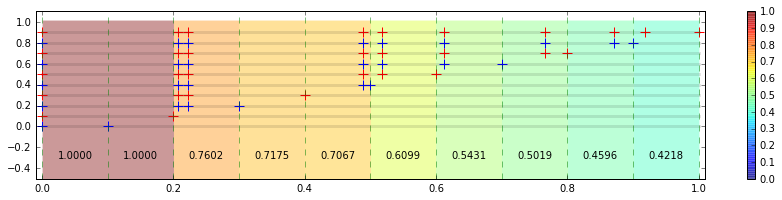

In [7]:
# uvgap metric from the paper not requiring gridding in |u|
image2 = np.zeros((1, num_bins))
for i in range(num_bins):
    q_min = bin_edges[i]
    q_max = bin_edges[i + 1]
#     if q_min != 0.0:
#         x_b = np.sort(np.append(x, [q_min, q_max]))
#     else:
#         x_b = np.sort(np.append(x, [q_max]))
#     x_b = x_b[np.logical_and(x_b <= q_max, x_b >= q_min)]
    x_b = np.append(x, q_max)
    x_b = x_b[x_b <= q_max]
    print(i, x_b.shape, x_b, np.diff(x_b))
    uvgap_bin = np.sum(np.diff(x_b)**2 / x_b[1:]) / q_max
    image2[0, i] = uvgap_bin

# plotting
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
colors = ['b', 'r']
for i in range(num_bins):
    q_max = bin_edges[i + 1]
    x_b = np.append(x, q_max)
    x_b = x_b[x_b <= q_max]
    ax.plot(x_b, np.zeros_like(x_b) + i * 0.1, '+', 
            color=colors[i%2], mew=1.0, ms=10.0)
    ax.plot([0.0, 1.0], [i*0.1, i*0.1], 'k-', alpha=0.1, lw=3.0)
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(-0.5, 1.1)
for edge in bin_edges:
    ax.plot([edge, edge], ax.get_ylim(), 'g--', lw=1.0, alpha=0.5)
im = ax.imshow(image2, interpolation='nearest', cmap='jet',  
               vmin=0.0, vmax=1.0, extent=[0.0, 1.0, -1.0, 1.0],
               alpha=0.4)
ax.figure.colorbar(im, ax=ax)
ax.set_aspect('auto')
for i in range(num_bins):
    ax.text(bin_centres[i], -0.3, '%.4f' % (image2[0, i]), 
            ha='center')

In [13]:
# TODO(BM) better way of evaluating what diffs are needed for each bin...?
print(data_idx-1)
print(bin_idx)
print('data indices in each bin:')
# data indices in each bin
for i in range(num_bins):
    print(np.where(bin_idx == i + 1)[0])

[0 0 2 2 2 4 5 5 6 8]
[ 1  3  3  5  6  7  8  9 10]
data indices in each bin:
[0]
[]
[1 2]
[]
[3]
[4]
[5]
[6]
[7]
[8]
